# Importando Bibliotecas 



---


Iremos importar as bibliotecas necessárias para a análise exploratória de alguns dados eleitorais dos anos de 2018 e 2020



In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
sns.set()

# Importando o dataset do perfil candidatos do Estado de SP em 2020



---

Estou importando a primeira base onde irei fazer uma análise exploratória dos candidatos do Estado de São Paulo



In [ ]:
cand_SP_2020 = pd.read_csv('/content/drive/My Drive/consulta_cand_2020_SP.csv', ";" , encoding= 'iso-8859-1')

# Conhecendo o dataset

---



Um exemplo de como é a base de dados dos candidatos

In [ ]:
# Criando um sample com 5 registros

cand_SP_2020.sample(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
36022,05/10/2020,12:29:54,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,64351,GARÇA,12,VICE-PREFEITO,250000641627,45,PEDRO HENRIQUE SCARTEZINI,PEDRO SCARTEZINI,#NULO#,71193243815,PEDROHSCARTEZINI@HOTMAIL.COM,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,COLIGAÇÃO,28,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,250000056353,GARÇA FORTE E HUMANIZADA,CIDADANIA / PRTB / PSDB,1,BRASILEIRA NATA,SP,-3,GARÇA,03/12/1953,67,52448330191,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,923,APOSENTADO (EXCETO SERVIDOR PÚBLICO),-1,-1,#NULO#,N,S,-1,6001262720206260047,-1,#NULO#,-1,#NULO#,NÃO
63382,05/10/2020,12:29:54,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,65951,JAGUARIÚNA,13,VEREADOR,250000676976,28000,DENISE DE FATIMA FRANCO DE LIMA,DENISE LIMA,#NULO#,7969677843,BRUNA.R.BORGES@HOTMAIL.COM,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,PARTIDO ISOLADO,28,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,250000060993,PARTIDO ISOLADO,PRTB,1,BRASILEIRA NATA,SP,-3,JAGUARIÚNA,25/12/1965,55,143829450191,4,FEMININO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,581,DONA DE CASA,50908,-1,#NULO#,N,S,-1,6001653920206260333,-1,#NULO#,-1,#NULO#,NÃO
37328,05/10/2020,12:29:54,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,66990,MIRACATU,13,VEREADOR,250000751102,40333,CÉLIO DE OLIVEIRA,CÉLIO DO MORAES,#NULO#,5073118847,PROJETOFORTEMIRACATU@GMAIL.COM,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,PARTIDO ISOLADO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,250000071188,PARTIDO ISOLADO,PSB,1,BRASILEIRA NATA,SP,-3,ARARAS,01/03/1962,58,70391930191,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),1,BRANCA,601,AGRICULTOR,30935,-1,#NULO#,N,S,-1,6000784020206260218,-1,#NULO#,-1,#NULO#,NÃO
13818,05/10/2020,12:29:54,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,71978,TREMEMBÉ,13,VEREADOR,250000632525,14567,SUELI PALMEIRA,SUELI PALMEIRA,#NULO#,18561949813,PXLN@UOL.COM.BR,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,PARTIDO ISOLADO,14,PTB,PARTIDO TRABALHISTA BRASILEIRO,250000051658,PARTIDO ISOLADO,PTB,1,BRASILEIRA NATA,SP,-3,TAUBATÉ,12/05/1972,48,263254650183,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),3,PARDA,266,PROFESSOR DE ENSINO MÉDIO,32935,-1,#NULO#,N,S,-1,6001494520206260314,-1,#NULO#,-1,#NULO#,NÃO
62370,05/10/2020,12:29:54,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,66672,MAGDA,13,VEREADOR,250001198062,22100,ROSANGELA PEREIRA DA SILVA,ROSANGELA,#NULO#,34611435881,ROSANGELAPDS19@GMAIL.COM,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,PARTIDO ISOLADO,22,PL,PARTIDO LIBERAL,250000147299,PARTIDO ISOLADO,PL,1,BRASILEIRA NATA,SP,-3,ESTRELA D OESTE,12/03/1984,36,321619060141,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),3,PARDA,298,SERVIDOR PÚBLICO MUNICIPAL,12308,-1,#NULO#,N,N,-1,6002895020206260162,-1,#NULO#,-1,#NULO#,NÃO


In [ ]:
# Verificando quantas linhas e colunas possui o dataset

cand_SP_2020.shape

(92635, 63)

In [ ]:
# Verificando informação sobre o tipo de objeto em cada coluna do dataset

cand_SP_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92635 entries, 0 to 92634
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     92635 non-null  object
 1   HH_GERACAO                     92635 non-null  object
 2   ANO_ELEICAO                    92635 non-null  int64 
 3   CD_TIPO_ELEICAO                92635 non-null  int64 
 4   NM_TIPO_ELEICAO                92635 non-null  object
 5   NR_TURNO                       92635 non-null  int64 
 6   CD_ELEICAO                     92635 non-null  int64 
 7   DS_ELEICAO                     92635 non-null  object
 8   DT_ELEICAO                     92635 non-null  object
 9   TP_ABRANGENCIA                 92635 non-null  object
 10  SG_UF                          92635 non-null  object
 11  SG_UE                          92635 non-null  int64 
 12  NM_UE                          92635 non-null  object
 13  C

# Modelagem do Dataset

In [ ]:
# Filtrando os campos úteis a minha análise

cand_SP_2020 = cand_SP_2020.filter(items= ['NM_UE','DS_CARGO','NR_CANDIDATO',
                                           'NM_CANDIDATO','NR_PARTIDO','SG_PARTIDO',
                                           'DS_GENERO','DS_GRAU_INSTRUCAO',
                                           'DS_ESTADO_CIVIL','ST_REELEICAO',
                                           'DS_COR_RACA',
                                           'NR_IDADE_DATA_POSSE','VR_DESPESA_MAX_CAMPANHA'])

In [ ]:
# Definindo uma variável para os candidatos do município de São Caetano do Sul

cand_SCS_2020 = cand_SP_2020[cand_SP_2020['NM_UE'] == 'SÃO CAETANO DO SUL']

In [ ]:
cand_SCS_2020

,NM_UE,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,ST_REELEICAO,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
365,SÃO CAETANO DO SUL,VEREADOR,23423,MARCEL FRANCO MUNHOZ,23,CIDADANIA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),N,BRANCA,51,290257
367,SÃO CAETANO DO SUL,VEREADOR,51288,DORALICE ANTONIA DE LIMA,51,PATRIOTA,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),N,BRANCA,53,290257
669,SÃO CAETANO DO SUL,VEREADOR,51555,CASSIA MORENO DE GODOY,51,PATRIOTA,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),N,BRANCA,53,290257
814,SÃO CAETANO DO SUL,PREFEITO,18,EDUARDO CASONATO AVILA,18,REDE,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),N,BRANCA,42,2241374
1077,SÃO CAETANO DO SUL,VICE-PREFEITO,13,VERA LUCIA SEVERIANO,13,PT,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),N,BRANCA,60,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90471,SÃO CAETANO DO SUL,VEREADOR,10123,WALTER ESTEVAM JUNIOR,10,REPUBLICANOS,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),N,BRANCA,59,290257
91079,SÃO CAETANO DO SUL,VEREADOR,55123,MARCUS VINICIUS MARTINEZ,55,PSD,MASCULINO,SUPERIOR COMPLETO,CASADO(A),N,BRANCA,41,290257
91535,SÃO CAETANO DO SUL,VEREADOR,19888,JORGE EDNAR FRANCISCO,19,PODE,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),N,PRETA,59,290257
91802,SÃO CAETANO DO SUL,VEREADOR,22033,CAIO EDUARDO KIN JESUS FUNAKI,22,PL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),N,BRANCA,28,290257


In [ ]:
# Filtrando dos candidatos de São Caetano do Sul, apenas aqueles que estão concorrendo ao cargo de vereador

vereador_SCS_2020 = cand_SCS_2020[cand_SCS_2020['DS_CARGO'] == 'VEREADOR']

In [ ]:
vereador_SCS_2020

,NM_UE,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,ST_REELEICAO,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
365,SÃO CAETANO DO SUL,VEREADOR,23423,MARCEL FRANCO MUNHOZ,23,CIDADANIA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),N,BRANCA,51,290257
367,SÃO CAETANO DO SUL,VEREADOR,51288,DORALICE ANTONIA DE LIMA,51,PATRIOTA,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),N,BRANCA,53,290257
669,SÃO CAETANO DO SUL,VEREADOR,51555,CASSIA MORENO DE GODOY,51,PATRIOTA,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),N,BRANCA,53,290257
1187,SÃO CAETANO DO SUL,VEREADOR,18025,NILSON RIBEIRO DA SILVA,18,REDE,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),N,BRANCA,64,290257
1195,SÃO CAETANO DO SUL,VEREADOR,70270,CAIQUE IPPOLITO,70,AVANTE,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),N,BRANCA,27,290257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90471,SÃO CAETANO DO SUL,VEREADOR,10123,WALTER ESTEVAM JUNIOR,10,REPUBLICANOS,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),N,BRANCA,59,290257
91079,SÃO CAETANO DO SUL,VEREADOR,55123,MARCUS VINICIUS MARTINEZ,55,PSD,MASCULINO,SUPERIOR COMPLETO,CASADO(A),N,BRANCA,41,290257
91535,SÃO CAETANO DO SUL,VEREADOR,19888,JORGE EDNAR FRANCISCO,19,PODE,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),N,PRETA,59,290257
91802,SÃO CAETANO DO SUL,VEREADOR,22033,CAIO EDUARDO KIN JESUS FUNAKI,22,PL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),N,BRANCA,28,290257


# Explorando o dataset

---

Obtendo insights à partir da análise exploratória dos dados de perfil dos candidatos ao cargo de vereador municipal da cidade de São Caetano do Sul no ano de 2020.


# Distribuição por gênero na cidade de São Caetano do Sul e comparação com números do Estado de SP

In [ ]:
vereador_SCS_2020['DS_GENERO'].value_counts(normalize=True)*100

MASCULINO    65.860215
FEMININO     34.139785
Name: DS_GENERO, dtype: float64

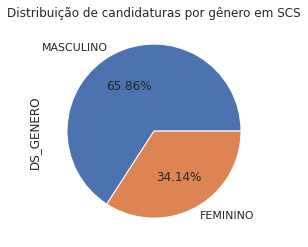

In [ ]:
vereador_SCS_2020['DS_GENERO'].value_counts(normalize=True).plot(kind='pie' , autopct='%1.2f%%', title='Distribuição de candidaturas por gênero em SCS');

In [ ]:
cand_SP_2020['DS_GENERO'].value_counts(normalize=True)*100

MASCULINO    66.700491
FEMININO     33.299509
Name: DS_GENERO, dtype: float64

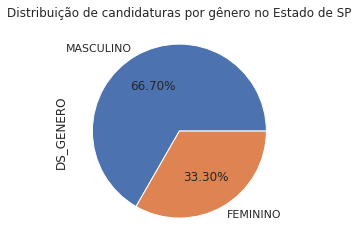

In [ ]:
cand_SP_2020['DS_GENERO'].value_counts(normalize=True).plot(kind='pie' , autopct='%1.2f%%', title='Distribuição de candidaturas por gênero no Estado de SP');

Há um leve acréscimo percentual no número de pessoas que se declararam mulheres no pleito ao cargo de vereador em comparação com a média estadual, sendo 34,14% em São Caetano do Sul e 33,30% a nível estadual.

---



# Distribuição por raça autodeclarada dos candidatos a vereador em São Caetano do Sul e e comparação com números do Estado de SP

In [ ]:
vereador_SCS_2020['DS_COR_RACA'].value_counts(normalize=True)*100

BRANCA            82.795699
PARDA             10.752688
PRETA              5.913978
AMARELA            0.268817
SEM INFORMAÇÃO     0.268817
Name: DS_COR_RACA, dtype: float64

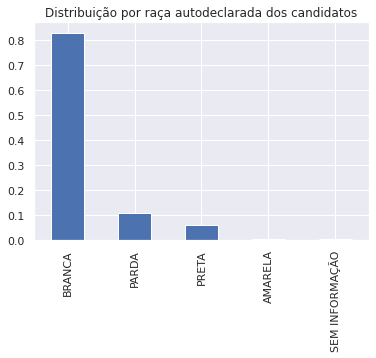

In [ ]:
vereador_SCS_2020['DS_COR_RACA'].value_counts(normalize=True).plot(kind='bar',title='Distribuição por raça autodeclarada dos candidatos');

In [ ]:
cand_SP_2020['DS_COR_RACA'].value_counts(normalize=True)*100

BRANCA            69.374427
PARDA             20.131700
PRETA              9.240568
SEM INFORMAÇÃO     0.822583
AMARELA            0.352998
INDÍGENA           0.077724
Name: DS_COR_RACA, dtype: float64

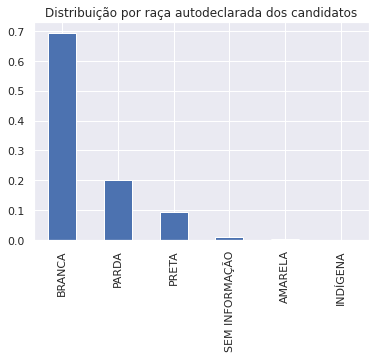

In [ ]:
cand_SP_2020['DS_COR_RACA'].value_counts(normalize=True).plot(kind='bar',title='Distribuição por raça autodeclarada dos candidatos');

Há uma menor diversidade no município de São Caetano do Sul em comparação com os dados estaduais, onde os autodeclarados brancos são 82% contra 69% do total estadual.


---



# Escolaridade dos candidatos ao cargo de vereador na cidade de São Caetano do Sul

In [ ]:
vereador_SCS_2020['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

SUPERIOR COMPLETO                54.838710
ENSINO MÉDIO COMPLETO            24.462366
SUPERIOR INCOMPLETO               8.870968
ENSINO FUNDAMENTAL COMPLETO       8.333333
ENSINO FUNDAMENTAL INCOMPLETO     2.150538
ENSINO MÉDIO INCOMPLETO           1.344086
Name: DS_GRAU_INSTRUCAO, dtype: float64

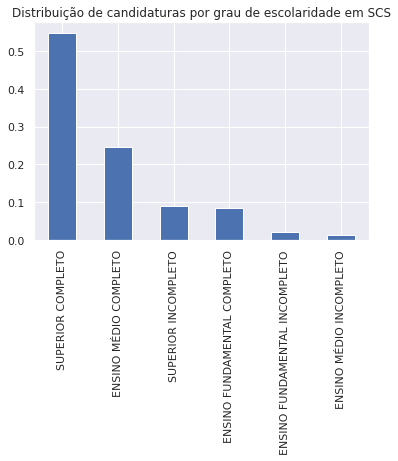

In [ ]:
vereador_SCS_2020['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='bar', title='Distribuição de candidaturas por grau de escolaridade em SCS');

In [ ]:
cand_SP_2020['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

ENSINO MÉDIO COMPLETO            39.432180
SUPERIOR COMPLETO                28.231230
ENSINO FUNDAMENTAL COMPLETO      11.833540
ENSINO FUNDAMENTAL INCOMPLETO     8.704054
SUPERIOR INCOMPLETO               4.912830
ENSINO MÉDIO INCOMPLETO           4.417337
LÊ E ESCREVE                      2.466670
ANALFABETO                        0.002159
Name: DS_GRAU_INSTRUCAO, dtype: float64

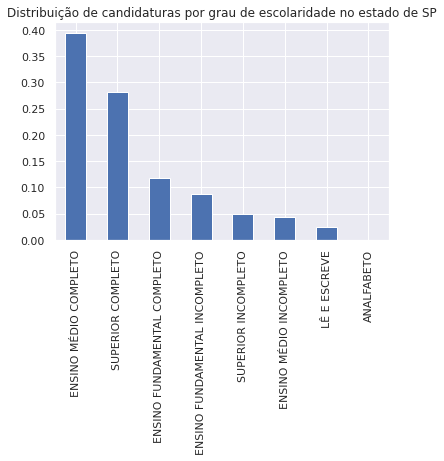

In [ ]:
cand_SP_2020['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='bar', title='Distribuição de candidaturas por grau de escolaridade no estado de SP');

Em São Caetano do Sul o percentual de candidatos com ensino superior completo é de 54.83% contra apenas 28.23% em todo o Estado, sendo que, em nível estadual o índice mais significativo é o de candidatos com o ensino médio completo com percentual de 39.43%

---



# Há renovação de candidatos?

In [ ]:
len(vereador_SCS_2020)

372

In [ ]:
vereador_SCS_2020['ST_REELEICAO'].value_counts(normalize=True)*100

N    97.849462
S     2.150538
Name: ST_REELEICAO, dtype: float64

In [ ]:
vereador_SCS_2020['ST_REELEICAO'].value_counts()

N    364
S      8
Name: ST_REELEICAO, dtype: int64

De 372 candidatos ao cargo de vereador no município de São Caetano do Sul, apenas 8 candidatos ou 2,15% do total estão tentando a reeleição ao cargo, quando comparamos ao ano de 2016.

---



# Distribuição etária dos candidatos

In [ ]:
vereador_SCS_2020['NR_IDADE_DATA_POSSE'].value_counts().sort_index()

21      4
22      1
23      1
24      1
26      2
27      5
28      4
29      1
30      1
31      4
32      2
33      6
34      5
35      2
36      6
37      4
38     12
39      8
40     13
41      7
42      9
43     10
44     10
45     14
46     17
47     19
48     10
49     14
50      9
51      6
52      9
53     13
54     10
55     14
56     16
57     10
58      8
59      9
60      6
61      6
62      7
63      7
64     11
65      7
66      5
67      3
68      6
69      4
70      2
71      4
72      4
74      1
75      1
76      1
101     1
Name: NR_IDADE_DATA_POSSE, dtype: int64

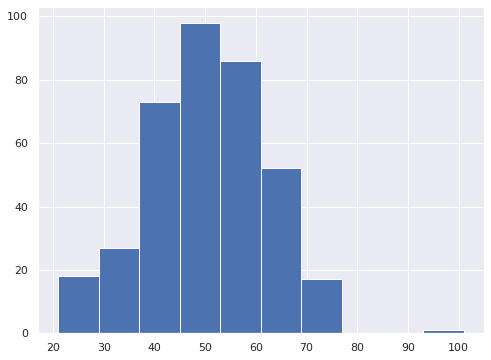

In [ ]:
vereador_SCS_2020['NR_IDADE_DATA_POSSE'].hist(bins = 10, figsize = (8,6));

Pode-se observar que há uma concentração maior de candidatos na faixa dos 40 até 79 anos com maior prevalência na faixa de 50-59 anos de idade.
Também pode-se observar que o candidato mais com idade mais avançada teria 101 anos na data da posse e que há 4 candidatos com idade de 21 anos na data da posse.



---


#Partidos políticos

---
Qual a relevância das candidaturas de esquerda em São Caetano do Sul?


In [ ]:
vereador_SCS_2020['SG_PARTIDO'].value_counts()

PRTB             29
PSD              29
PL               29
PTB              29
PODE             29
AVANTE           29
PSDB             29
CIDADANIA        28
PDT              22
DEM              21
PP               21
REDE             20
REPUBLICANOS     17
PSOL             14
PT                8
PATRIOTA          6
NOVO              6
SOLIDARIEDADE     3
PV                3
Name: SG_PARTIDO, dtype: int64

In [ ]:
df = {
      'Partido' : ['PTB','PL', 'PRTB', 'AVANTE', 'PSD','PSDB','PODE','CIDADANIA',
                  'PDT','PP','DEM','REDE','REPUBLICANOS','PSOL','PT','PATRIOTA',
                  'NOVO','SOLIDARIEDADE','PV'],
      
       'Candidatos': ['29','29','29','29','29','29','29','28','22','21','21','20',
                      '17','14','8','6','6','3','3'],
      'Posicionamento': ['Direita', 'Direita', 'Direita', 'Direita', 'Direita',
                         'Direita', 'Direita', 'Direita','Centro-esquerda', 
                         'Direita', 'Direita','Centro-esquerda', 'Direita',
                         'Esquerda', 'Esquerda','Direita','Direita','Direita',
                         'Direita']
}
df = pd.DataFrame(df)
df          

,Partido,Candidatos,Posicionamento
0,PTB,29,Direita
1,PL,29,Direita
2,PRTB,29,Direita
3,AVANTE,29,Direita
4,PSD,29,Direita
5,PSDB,29,Direita
6,PODE,29,Direita
7,CIDADANIA,28,Direita
8,PDT,22,Centro-esquerda
9,PP,21,Direita


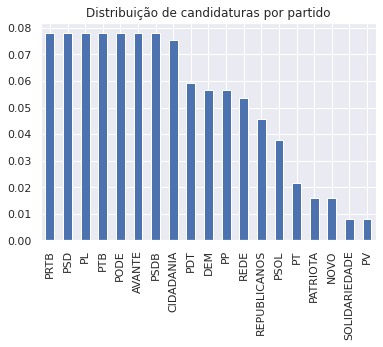

In [ ]:
vereador_SCS_2020['SG_PARTIDO'].value_counts(normalize=True).plot(kind='bar',title='Distribuição de candidaturas por partido');

Pode-se observar que há a prevalência dos ditos partidos de direita e centro-direita no município de São Caetano do Sul. Sendo que, PL, PSD, AVANTE, PRTB, PODEMOS, PSDB, PTB e CIDADANIA são os partidos com maior número de postulantes ao cargo de vereador com 29 candidatos, por outro lado o SOLIDARIEDADE e o PV seguram a lanterninha nesse quesito com apenas 3 postulantes. Os candidatos de centro-esquerda e esquerda somam 64 candidaturas (17,20%) enquanto as 308 restantes (82,79%) são para siglas da direita.

---

